# Homework 4
## Anna Tigranyan

**Dataset**		
Fraud_data_with_country.csv 

**About**	 	 		
Dataset presents purchases from an online store.<br>
There are two types of purchases: fraud and normal. 				

**Metadata**<br>	
<br>
**transaction_id** - id of a transaction<br>
**Signup_time** - user/device signed up date and time<br>
**purchase_time** - user/device purchase date and time<br>
**Purchase_value** -  value of a specific purchase<br>
**Device_id** - unique id for each device(consider as a user_id)<br>
**Source **- purchase source: Ads, SEO, etc. <br>
**Browser** - purchase browser<br>
**sex**  - sex of a user/device<br>
**age**- age of a user/device<br>
**country** -  device country<br>
**class** -  1: fraud purchase, 0: normal purchase<br>
<br>

**Ignore user_id and ip_address columns<br>
<br>
<br>

**Business questions**
1. Which age, country, sex, browser, source are the most popular? Use bar, stacked bar, pie charts to present your results.

2. In which months fraud purchases are most likely to happen? Use a bar chart.

3. In which weekdays fraud purchases are most likely to happen? Use a bar chart.

4. Are there cases when a user/device did more than one fraud purchase in a given time range? Use text to present your results.

5. Find fraud and normal purchase distribution over time in a given time period and averaged in a given time period. Use line and bar, pie charts.

6. How many users did at least one normal purchase before a fraud purchase. Use text to present your results.

7. Is there a correlation between purchase value and class? Use scatter plot and colors.

8. What is the average time between sign up time and purchase time? Use histograms, box plots.

9. Is there a correlation between purchase_value and age? Use scatter plot.

10. Describe your insights in every step. And also have final summary where will be presented important insights in few words.
<br>
Bunus (+2 point)<br>
Do a deep dive and find at least 2 more insights


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r'Fraud_data_with_country.csv')

In [3]:
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,IP_country
0,22058,24-02-2015 22:55:49,18-04-2015 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,07-06-2015 20:39:50,08-06-2015 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,01-01-2015 18:52:44,01-01-2015 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,28-04-2015 21:13:25,04-05-2015 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,United States
4,221365,21-07-2015 07:09:52,09-09-2015 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


**Removing unusable columns:**<br>
1.user_id<br>
2.ip_address 

In [4]:
df = df.drop(['user_id','ip_address'], axis=1)

**Changing types** of :<br> 1.signup_time <br> 2.purchase_time<br> to **datetime** for further calculations.

In [5]:
# Changing type of 'purchase_time' to datetime
df['purchase_time'] = pd.to_datetime(df['purchase_time'],format= '%d-%m-%Y %H:%M:%S').dt.date 
# Changing type of 'signup_time' to datetime
df['signup_time'] = pd.to_datetime(df['signup_time'],format= '%d-%m-%Y %H:%M:%S').dt.date 

### 1.Which age, country, sex, browser, source are the most popular? Use bar, stacked bar, pie charts to present your results.

In [6]:
vars = ['age','IP_country','sex','browser','source']

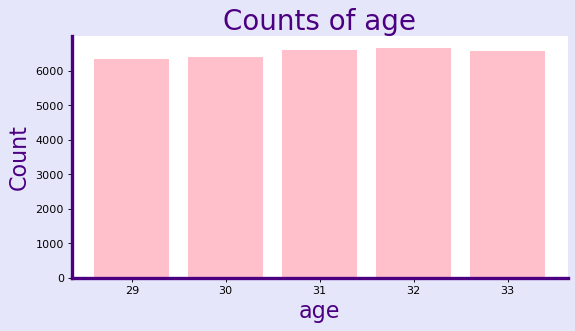

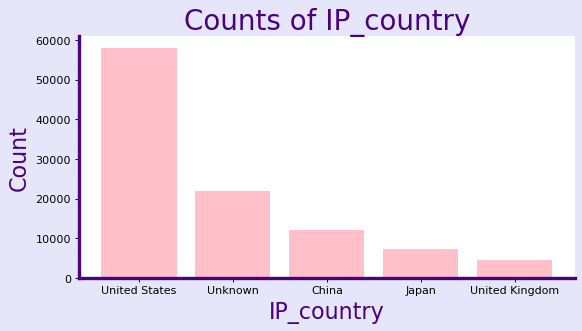

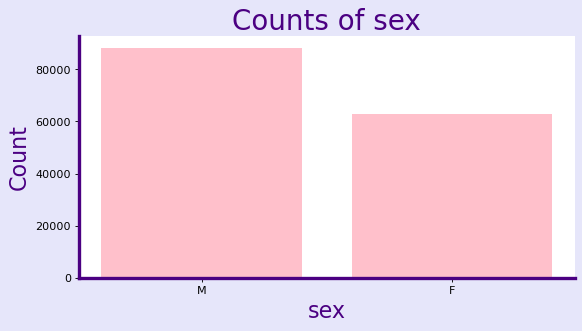

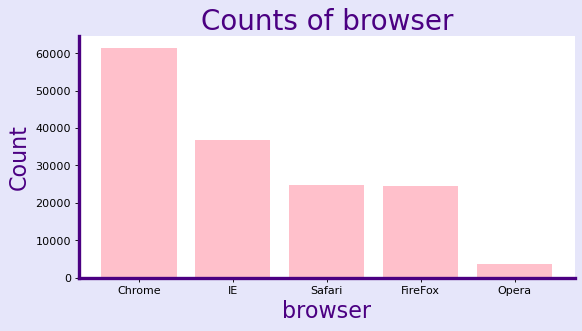

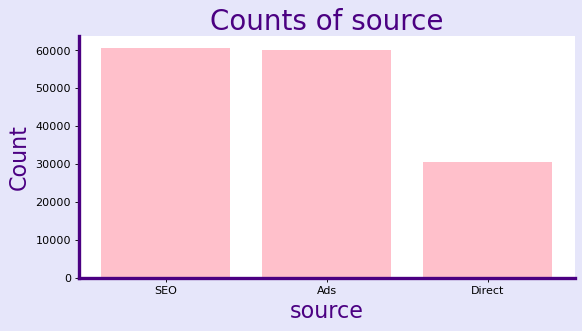

In [7]:
for i in vars:
    np.random.seed(196808012)

    x = df[i].value_counts()[:5] #choosing top 5  by count

    labels = [] # titles names 
    for row in x.index:
        labels.append(row)

    fig, ax = plt.subplots(figsize=(8,4),dpi=80,facecolor="lavender")
    ax.bar(labels, x, color = 'pink');

    ax.set_title(f'Counts of {i}',fontsize = 25, color = 'indigo')# Add a title to the axes.
    ax.set_ylabel('Count',color ='indigo',size = "20") # Add a y-label to the axes.
    ax.set_xlabel(f'{i}',color ='indigo',size = "20") # Add a x-label to the axes.

    # colering and linewidths of x and y axes 

    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(3)
        ax.spines[axis].set_color("indigo")
    for axi in ['top','right']:  
        ax.spines[axi].set_color(None)
    

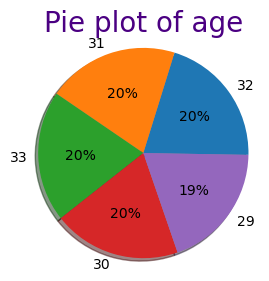

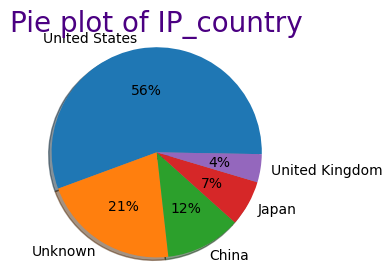

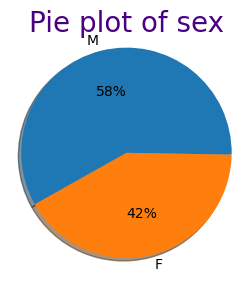

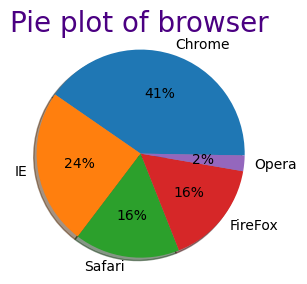

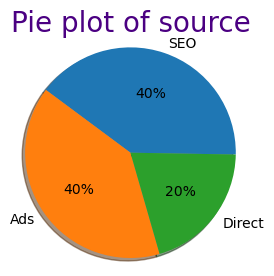

In [8]:
for i in vars:
    x = df[i].value_counts()[:5] #choosing top 5 by count

    labels = [] # titles names 
    for row in x.index:
        labels.append(row)
    
    # Pie chart

    fig, ax = plt.subplots(figsize = (3,3),dpi=100)

    ax.pie(x, labels=labels,autopct='%1.0f%%',shadow=True, startangle=-1,radius=1)

    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title(f'Pie plot of {i}', color = 'indigo',fontsize = 20)
    ;

The most popular:<br>
-**age** is 32<br>
-**country** is United States<br>
-**sex** is Male<br>
-**browser** is Chrome<br>
-**source** is SEO<br>

### 2.In which months fraud purchases are most likely to happen? Use a bar chart.

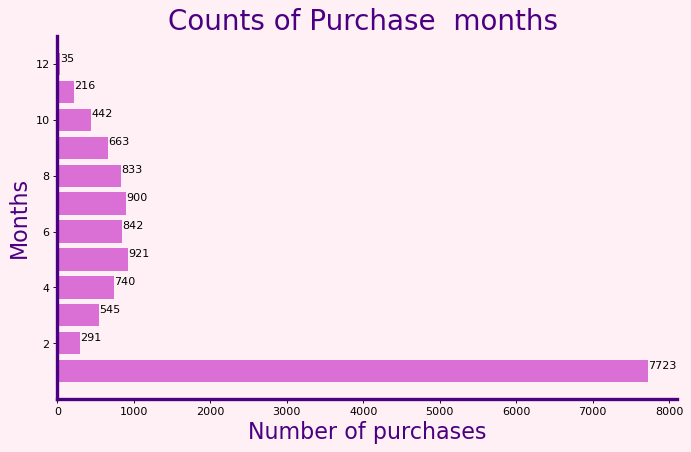

In [9]:
is_fraud =  df.loc[df['class'] == 1] # rows from df where class is fraud(1)

month = pd.DatetimeIndex(is_fraud['purchase_time']).month # Getting month from 'purchase_time'

x = month.value_counts() # count purchases by month

#labels
labels = []
for row in x.index:
    labels.append(row)

fig, ax = plt.subplots(figsize=(10,6),dpi=80,facecolor='lavenderblush')
ax.set_facecolor('lavenderblush')
ax.barh(labels, x, color = 'orchid')

# Adding annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10,color ='black')
    
#labels & title
ax.set_title('Counts of Purchase  months ',fontsize = 25, color = 'indigo')
ax.set_ylabel('Months',color ='indigo',size = "20")
ax.set_xlabel('Number of purchases',color ='indigo',size = "20") 

#ax design
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(3)
    ax.spines[axis].set_color("indigo")
for axi in ['top','right']:  
    ax.spines[axi].set_color(None)

Fraud purchases are most likely to happen in **January  (1)**.

### 3.In which weekdays fraud purchases are most likely to happen? Use a bar chart.

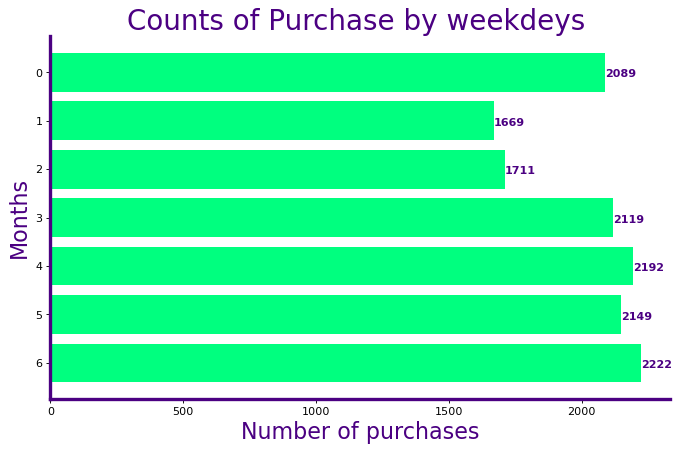

In [15]:
weekdays = pd.DatetimeIndex(is_fraud['purchase_time']).weekday # Getting weekdays from 'purchase_time'

x = weekdays.value_counts() # count purchases by weekday

labels = []
for i in x.index:
    labels.append(i)

fig, ax = plt.subplots(figsize=(10,6),dpi=80)
ax.barh(labels, x, color = 'springgreen');

# Show top values
ax.invert_yaxis()

# Adding annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='indigo')
    
#labels & title
ax.set_title('Counts of Purchase by weekdeys ',fontsize = 25, color = 'indigo')
ax.set_ylabel('Months',color ='indigo',size = "20")
ax.set_xlabel('Number of purchases',color ='indigo',size = "20") 

#ax design
ax.set_yticks(labels)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(3)
    ax.spines[axis].set_color("indigo")
for axi in ['top','right']:  
    ax.spines[axi].set_color(None)
    


Fraud purchases are most likely to happen in **Sunday(6)**

### 4.Are there cases when a user/device did more than one fraud purchase in a given time range? Use text to present your results.

In [422]:
is_fr =  df['device_id'][df['class'] == 1] # Choosing device_id-s where class is fraud

In [423]:
# We use value_counts() to count number of purchases for each unique id
# And we choose id-s for which purchase number greater than 1
print(f'There are {sum(is_fr.value_counts() > 1)} cases when a user/device did more than one fraud purchase in a given time range')

There are 1044 cases when a user/device did more than one fraud purchase in a given time range


### 5.Find fraud and normal purchase distribution over time in a given time period and averaged in a given time period. Use line and bar, pie charts.

In [20]:
dt = df[['purchase_time','class']] # Choosing only usable columns from data.

is_fraud =  dt.loc[dt['class'] == 1] # rows from dt where class is fraud(1)
is_normal = dt.loc[dt['class'] == 0] # rows from dt where class is normal(0)

fr = is_fraud.groupby('purchase_time').count() # count of fraud purchases for each day
norm = is_normal.groupby('purchase_time').count() #count of normal purchases for each day

,class
purchase_time,
2015-01-01,570
2015-01-02,725
2015-01-03,548
2015-01-04,617
2015-01-05,556
...,...
2015-12-07,2
2015-12-08,2
2015-12-09,5


''

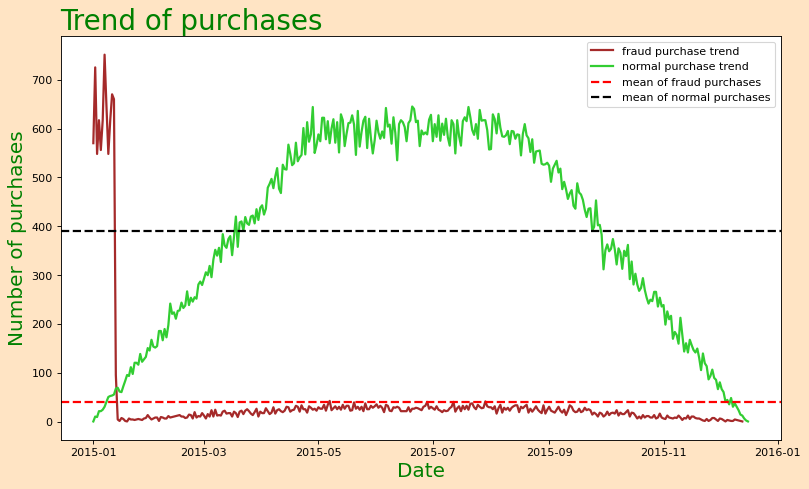

In [425]:
fig, ax = plt.subplots(figsize=(10,6), constrained_layout=True,dpi=80,facecolor='bisque')

ax.plot(fr['class'], label='fraud purchase trend',color='brown',linewidth=2)# fraud purchase trend line 
ax.plot(norm['class'], label='normal purchase trend',color='limegreen',linewidth=2) # normal purchase trend line 

# Adding mean lines to trend lines
ax.axhline(fr['class'].mean(), color='red', linestyle='dashed', linewidth=2,label='mean of fraud purchases')
ax.axhline(norm['class'].mean(), color='black', linestyle='dashed', linewidth=2,label='mean of normal purchases')

#add legends
ax.legend()

#ax design
ax.set_ylabel('Number of purchases',color ='green',size = "18") 
ax.set_xlabel('Date',color ='green',size = "18")     
ax.set_title("Trend of purchases",fontsize = 25,loc='left', 
             color = 'green') 
;

From above we can see that:<br>
- normal purchases are high in 05-09(in summer) months(01-05 increases, 09-01 decreases).
- fraud purchases are high in first month, then it decreases and becomes constant  

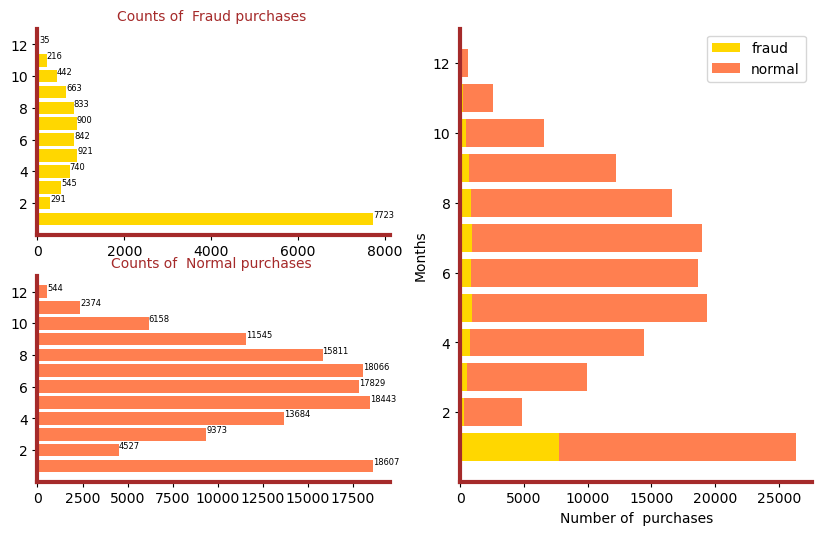

In [426]:
# Getting months from 'purchase_time'
fr_month = pd.DatetimeIndex(is_fraud['purchase_time']).month 
norm_month = pd.DatetimeIndex(is_normal['purchase_time']).month

f = fr_month.value_counts() # count purchases by month
n = norm_month.value_counts() # count purchases by month

#labels
labels = []
for j in f.index:
    labels.append(j)
        
fig, ax = plt.subplot_mosaic([['upleft', 'right'],
                               ['lowleft', 'right']],
                               figsize=(10,6),dpi=100)

#plots
ax['upleft'].barh(labels, f, color = 'gold')

ax['lowleft'].barh(labels, n, color = 'coral')

ax['right'].barh(labels, f, color = 'gold')
ax['right'].barh(labels, n,left=f,color = 'coral')

# Adding legend to right plot
ax['right'].legend(['fraud','normal'])

# Adding annotation to bars
for a in ax['upleft'].patches:
    ax['upleft'].text(a.get_width()+0.2, a.get_y()+0.5,
         str(round((a.get_width()), 2)),
             fontsize = 6,color ='black')
    
for b in ax['lowleft'].patches:
     ax['lowleft'].text(b.get_width()+0.2, b.get_y()+0.5,
          str(round((b.get_width()), 2)),
             fontsize = 6,color ='black') 
# titles and lebels
ax['upleft'].set_title(f'Counts of  Fraud purchases ',fontsize = 10, color = 'brown')
ax['lowleft'].set_title(f'Counts of  Normal purchases ',fontsize = 10, color = 'brown')
ax['right'].set_ylabel('Months',color ='black',size = "10")
ax['right'].set_xlabel(f'Number of  purchases',color ='black',size = "10") 

#ax design
for axis in ['bottom','left']:
    ax['upleft'].spines[axis].set_linewidth(3)
    ax['lowleft'].spines[axis].set_linewidth(3)
    ax['right'].spines[axis].set_linewidth(3)
    ax['upleft'].spines[axis].set_color("brown")
    ax['lowleft'].spines[axis].set_color("brown")
    ax['right'].spines[axis].set_color("brown")
    
for axi in ['top','right']:  
    ax['upleft'].spines[axi].set_color(None)
    ax['lowleft'].spines[axi].set_color(None)
    ax['right'].spines[axi].set_color(None)


From above we see that fraud purchases have the highest percentage in total in first month.

''

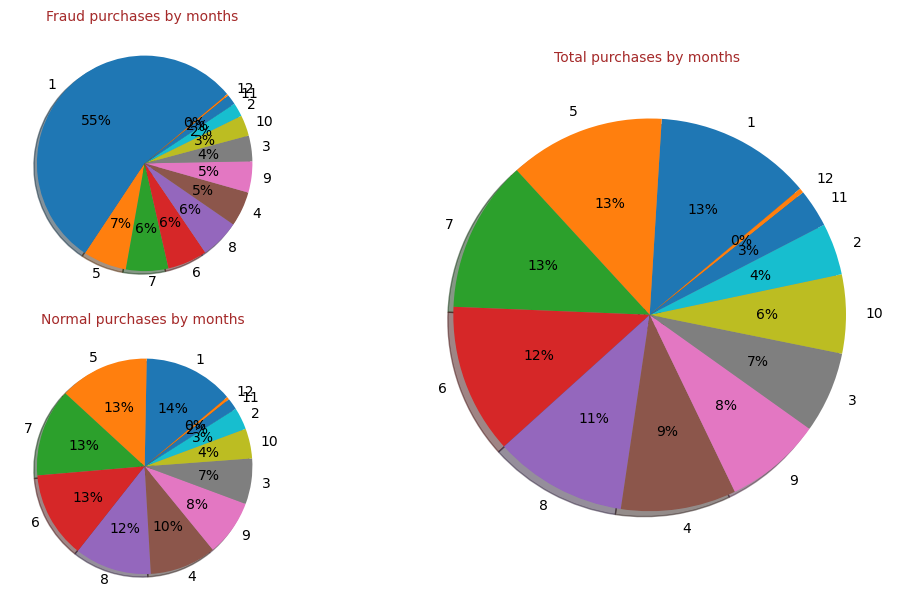

In [428]:
month = pd.DatetimeIndex(df['purchase_time']).month 
m = month.value_counts() # total purchases by month

labels = []
for j in f.index:
    labels.append(j)
        
fig, ax = plt.subplot_mosaic([['upleft', 'right'],
                               ['lowleft', 'right']],
                               figsize=(10,6),dpi=100,constrained_layout=True)


ax['upleft'].pie(f, labels=labels,autopct='%1.0f%%',shadow=True, startangle=40,radius=1)
ax['lowleft'].pie(n, labels=labels,autopct='%1.0f%%',shadow=True, startangle=40,radius=1)
ax['right'].pie(m, labels=labels,autopct='%1.0f%%',shadow=True, startangle=40,radius=1) 
              
ax['upleft'].set_title(f'Fraud purchases by months ',fontsize = 10, color = 'brown')
ax['lowleft'].set_title(f'Normal purchases by months ',fontsize = 10, color = 'brown')
ax['right'].set_title(f'Total purchases by months ',fontsize = 10, color = 'brown')


;

**55%**  of all fraud purchases were made in the **first month**.

### 6.How many users did at least one normal purchase before a fraud purchase. Use text to present your results.

In [429]:
df1 = df [['device_id','purchase_time','class']] # Choosing only usable columns from data.

# Creating 2 data frames (Divide df1 into 2 parts)։
is_fraud =  df1.loc[df1['class'] == 1] # rows from df1 where class is fraud(1)
is_normal = df1.loc[df1['class'] == 0] # rows from df1 where class is normal(0)

# Finding first normal and fraud purchase date for each unique device id
first_normal = is_normal.groupby('device_id')["purchase_time"].min()
first_fraud = is_fraud.groupby('device_id')["purchase_time"].min()

# Let's do left_on merge by 'device_id' in order to to get data frame where we will
# have first normal and first fraud purchase date for each unique device id
df2 = pd.merge(first_normal, first_fraud, left_on='device_id', right_index=True)

# And now whan we have  df2, we can choose from it device ids for which first normal purchase
# date is less than first fraud purchase date
at_least_one = df2.loc[df2['purchase_time_x'] < df2['purchase_time_y']]


at_least_one.shape[0]


980

**980** users did **at least one normal purchase** before **a fraud purchase**

### 7.Is there a correlation between purchase value and class? Use scatter plot and colors.

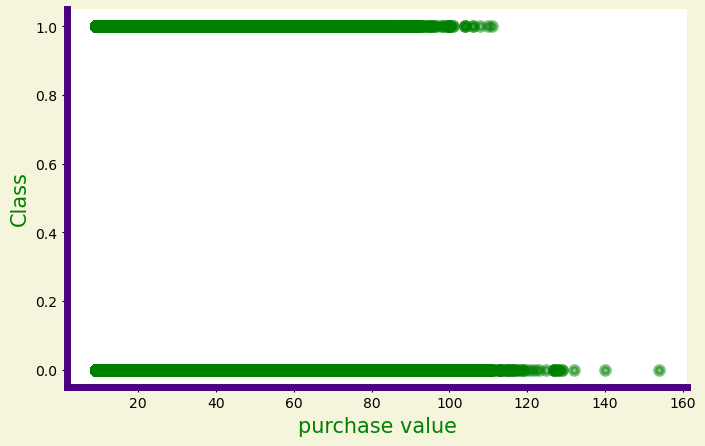

In [430]:
fig, ax = plt.subplots(figsize = (8,5),dpi=100,facecolor="beige")

ax.scatter(x=df['purchase_value'],y=df['class'],color='green',
                linewidths=3,marker = 'o',alpha=0.5)

ax.set_title('',fontsize = 25, color = 'green', backgroundcolor = 'honeydew')
ax.set_ylabel('Class',color ='green',size = "15") 
ax.set_xlabel('purchase value',color ='Green',size = "15") 

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(5)
    ax.spines[axis].set_color("indigo")
for axi in ['top','right']:  
    ax.spines[axi].set_color(None)

For **class 0** (normal purchase) we have higher purchase values than for **class 1** (fraud purchase).

### 8.What is the average time between sign up time and purchase time? Use histograms, box plots

''

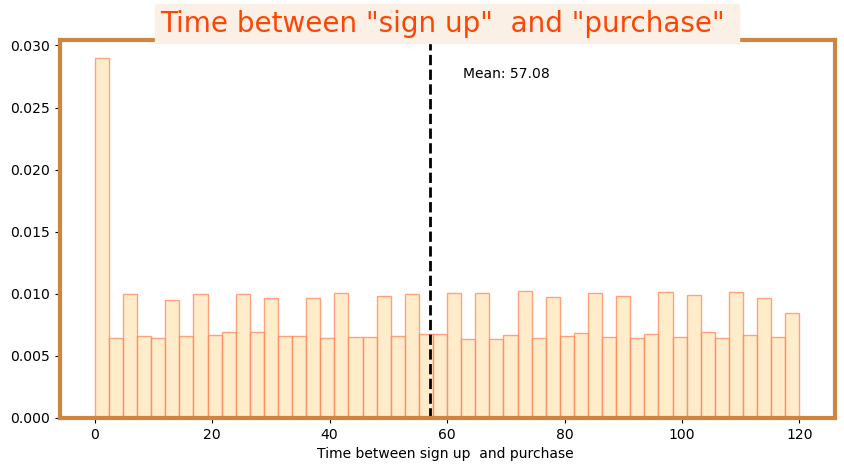

In [21]:
diff = df['purchase_time']-df['signup_time'] # time between sign up time and purchase time
diff = diff.dt.days #convert diff to int in order to plot histogram

fig, ax = plt.subplots(figsize=(10, 5),dpi=100)

# Histogram of diff
n, bins, patches = ax.hist(diff, 50,density = 1,color = 'moccasin',edgecolor='coral',alpha = 0.7)

# Adding mean line to histogram
ax.axvline(diff.mean(), color='black', linestyle='dashed', linewidth=2)

# Adding mean value to histogram
min_ylim, max_ylim = plt.ylim()
ax.text(diff.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(diff.mean()))

ax.set_xlabel('Time between sign up  and purchase ')
ax.set_title('Time between "sign up"  and "purchase" ',fontsize = 20, color = 'orangered', backgroundcolor = 'linen')

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)
    ax.spines[axis].set_color("peru")

;

''

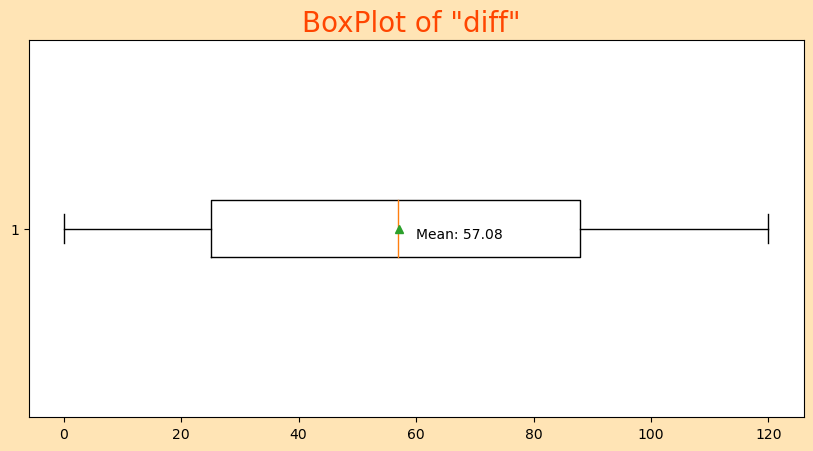

In [24]:
fig, ax = plt.subplots(figsize=(10, 5),dpi=100,facecolor='moccasin')

c = dict(markerfacecolor='red', marker='h')
ax.boxplot(diff,flierprops=c,showmeans=True,vert=False)

min_ylim, max_ylim = plt.ylim()
ax.text(diff.mean()*1.05, max_ylim*0.65, 'Mean: {:.2f}'.format(diff.mean()))

ax.set_title('BoxPlot of "diff" ',fontsize = 20, color = 'orangered')
;

From above histogram and boxplot we see that the **average time** between **sign up** time and **purchase time** is
approximately **57** days.From boxplot we see that **mean** is almost the same as the **median**.

### 9.Is there a correlation between purchase_value and age? Use scatter plot.

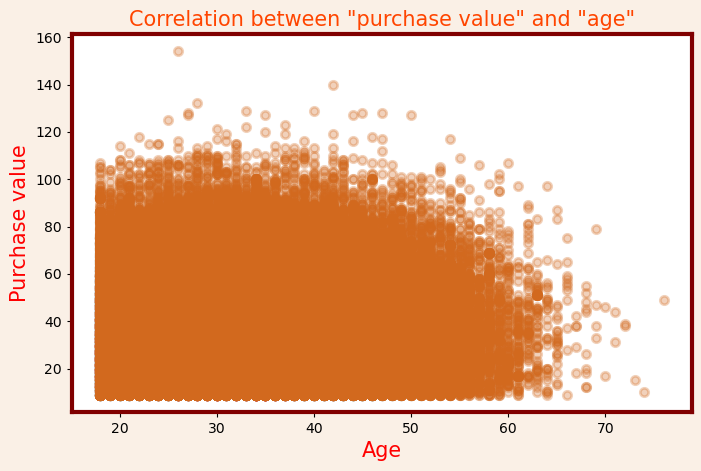

In [433]:
fig, ax = plt.subplots(figsize = (8,5),dpi=100,facecolor="linen")

ax.scatter(x=df['age'],y=df['purchase_value'],color='chocolate',
                linewidths=2,marker = 'o',alpha=0.3)

ax.set_title('Correlation between "purchase value" and "age"',fontsize = 15, color = 'orangered')
ax.set_ylabel('Purchase value',color ='red',size = "15") 
ax.set_xlabel('Age',color ='red',size = "15") 

for axis in ['bottom','left','top','right']:
    ax.spines[axis].set_linewidth(3)
    ax.spines[axis].set_color("maroon")


From above scatter plot we can say that there is **no strong connection** between **age** and **purchase_value**,but we can notice that older people purchase values are low.

### 10.Describe your insights in every step. And also have final summary where will be presented important insights in few words.

We have a dataset which presents purchases from an online store for a year(2015).There are two types of purchases: fraud and normal.From above  analysis we can say the following:
- Most of the purchases were made by US customers․
- Most of the Fraud purchases(55%) were made during the first month․
- On average, there were 400 normal purchases every month, in summer (including September and also January) this number reached about 600 and in other months it was lower ․ We can say that the volume of normal purchases depends on seasonality ․
- Average time between sign up time and purchase time for a customer is approximately 2 months and median is also the same:it means, the distribution is symmetric(After sign up, customers make purchases on any day with almost the same probability)․

### Bunus (+2 point)<br>Do a deep dive and find at least 2 more insights

#### Fraud and Normal purchases by age

In [434]:
dt = df[['age','class']] # Choosing only usable columns from data.

is_F=  dt.loc[dt['class'] == 1] # rows from dt where class is fraud(1)
is_N = dt.loc[dt['class'] == 0] # rows from dt where class is normal(0)

F = is_F.groupby('age').count() # count of fraud purchases for each age 
N = is_N.groupby('age').count() # count of fraud purchases for each age


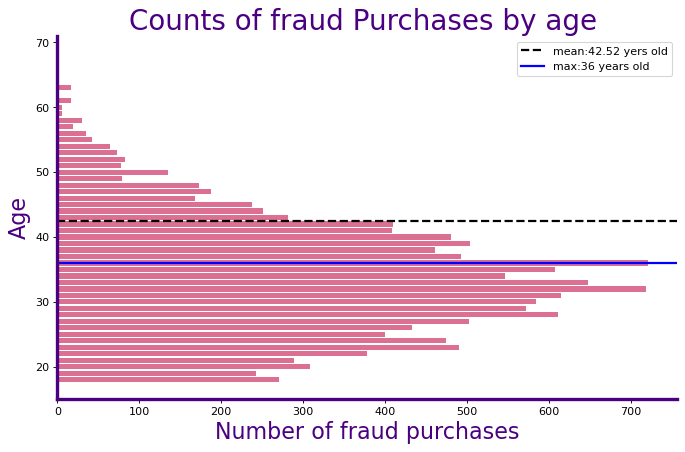

In [435]:
#labels
labels = []
mean = 0
for row in F.index:
    labels.append(row)
    mean = mean + row
mean = mean/len(labels) 

fig, ax = plt.subplots(figsize=(10,6),dpi=80)
ax.barh(labels, F['class'], color = 'palevioletred')
 
# show mean and max values    
ax.axhline(mean, color='black', linestyle='dashed', linewidth=2,label=f'mean:{mean} yers old')    
ax.axhline(36, color='b', linewidth=2,label='max:36 years old') 

ax.legend()
#labels & title
ax.set_title('Counts of fraud Purchases by age ',fontsize = 25, color = 'indigo')
ax.set_ylabel('Age',color ='indigo',size = "20")
ax.set_xlabel('Number of fraud purchases',color ='indigo',size = "20") 

#ax design
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(3)
    ax.spines[axis].set_color("indigo")
for axi in ['top','right']:  
    ax.spines[axi].set_color(None)

From above we can say that:<br>
- Most fraud purchases are made by 25-40 year olds(lower than mean) 
- Those who made the most fraud purchases were 36 years old - 721 purchases)
- Mean is 42.5

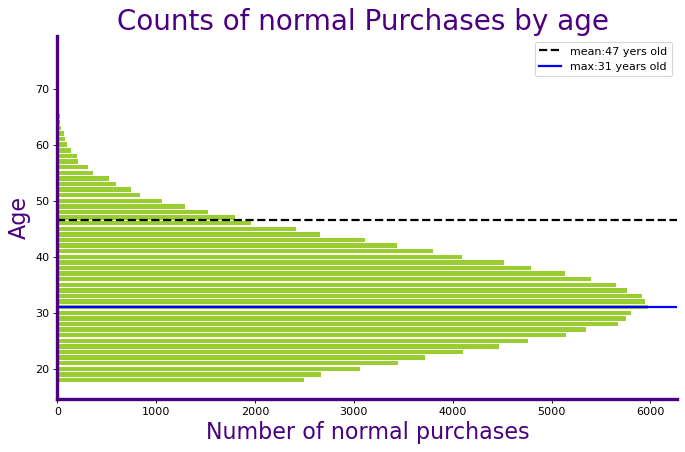

In [436]:
#labels
labels = []
mean = 0
for row in N.index:
    labels.append(row)
    mean = mean + row
mean = mean/len(labels) 

fig, ax = plt.subplots(figsize=(10,6),dpi=80)

ax.barh(labels, N['class'], color = 'yellowgreen')

# show mean and max values    
ax.axhline(mean, color='black', linestyle='dashed', linewidth=2,label=f'mean:{round(mean)} yers old')    
ax.axhline(31, color='b', linewidth=2,label='max:31 years old') 

ax.legend()

#labels & title
ax.set_title('Counts of normal Purchases by age ',fontsize = 25, color = 'indigo')
ax.set_ylabel('Age',color ='indigo',size = "20")
ax.set_xlabel('Number of normal purchases',color ='indigo',size = "20") 

#ax design
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(3)
    ax.spines[axis].set_color("indigo")
for axi in ['top','right']:  
    ax.spines[axi].set_color(None)

From above we can say that:<br>
- Most fraud purchases are made by 25-40 year olds(lower than mean) 
- Those who made the most fraud purchases were 31 years old - 5976 purchases)
- Mean is 47
- Mean and max are farther apart than in the previous case
- For normal purchases max's age(31) is low than for fraud purchases(36) 

#### Fraud and Normal purchases by countries

''

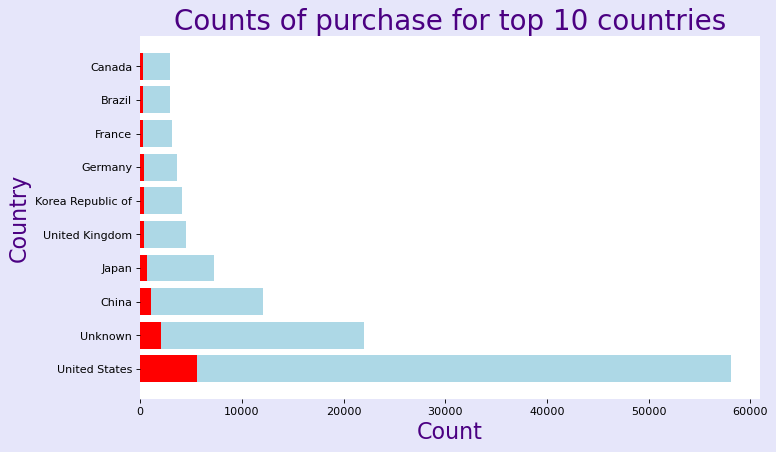

In [437]:
dt = df[['IP_country','class']] # Choosing only usable columns from data.

is_F=  dt.loc[dt['class'] == 1] # rows from dt where class is fraud(1)
is_N = dt.loc[dt['class'] == 0] # rows from dt where class is normal(0)

x = is_F['IP_country'].value_counts()[:10] 
y = is_N['IP_country'].value_counts()[:10] 

labels = [] # titles names 
for row in x.index:
    labels.append(row)

fig, ax = plt.subplots(figsize=(10,6),dpi=80,facecolor="lavender")
ax.barh(labels, x, color = 'r');
ax.barh(labels, y,left=x,color = 'lightblue')

ax.set_title(f'Counts of purchase for top 10 countries',fontsize = 25, color = 'indigo')
ax.set_ylabel('Country',color ='indigo',size = "20") 
ax.set_xlabel('Count',color ='indigo',size = "20") 

for axis in ['bottom','left','top','right']:  
    ax.spines[axis].set_color(None)
;    

In [438]:
x = is_F.groupby('IP_country').count() # froud purchases number for each country
y =  is_N.groupby('IP_country').count() # normal purchases number for each country

# Let's merge x and y in order to have  fraud and normal purchases number for each country
c =pd.merge(x, y, left_on='IP_country', right_index=True)

c.head()

,class_x,class_y
IP_country,,
Afghanistan,1,5
Albania,2,11
Algeria,12,110
Argentina,45,616
Armenia,2,13


Now let's calculate the **percentage of fraud purchases in total** for each country.

In [439]:
c['percent_of_fraud'] = c['class_x'] / (c['class_x']+c['class_y'])
# Choosing 10 largest
top_10 = c['percent_of_fraud'].nlargest(10)

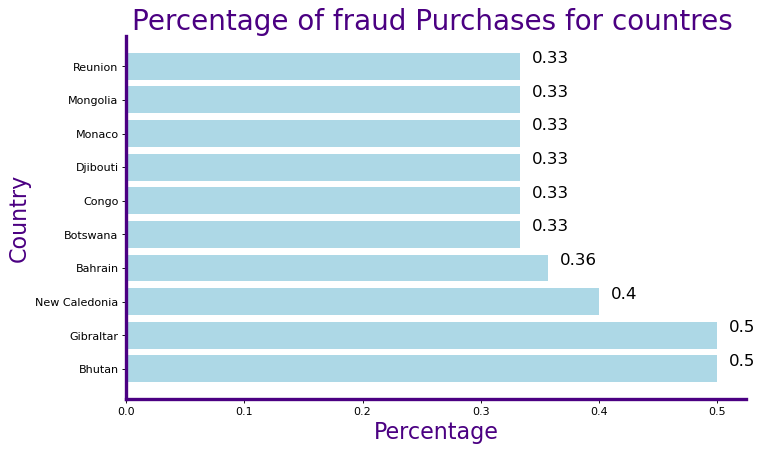

In [440]:
#labels
labels = []

for row in top_10.index:
    labels.append(row)


fig, ax = plt.subplots(figsize=(10,6),dpi=80)
ax.barh(labels, top_10, color = 'lightblue')
 
for i in ax.patches:
    ax.text(i.get_width()+0.01, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 15,color ='black')
#labels & title
ax.set_title('Percentage of fraud Purchases for countres ',fontsize = 25, color = 'indigo')
ax.set_ylabel('Country',color ='indigo',size = "20")
ax.set_xlabel('Percentage',color ='indigo',size = "20") 

#ax design
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(3)
    ax.spines[axis].set_color("indigo")
for axi in ['top','right']:  
    ax.spines[axi].set_color(None)

From above we see that countries with the highest percentage of fraud purchases in total purchases are:
1. Bhutan(50%)
2. Gibraltar(50%)
3. New Caledonia(40%)
<br>

We saw that despite the fact that the country with the highest purchases was the United States in percentage terms, that country is Bhutan.